In [4]:
import numpy as np
import pandas as pd
from skimage.measure import *
from math import *
from sklearn.cluster import KMeans
from skimage.io import imread
from skimage import *
from skimage.metrics import peak_signal_noise_ratio
import pylab
%matplotlib inline

### In this task we have a colored picture, the goal is to find number of clusters for pixels which will have PSNR-mertics quality above 20.0

### Read an image and transform it to a float array. 

In [5]:
image = imread('parrots.jpg')
image = img_as_float(image)

### Use KMeans to cluster pixels

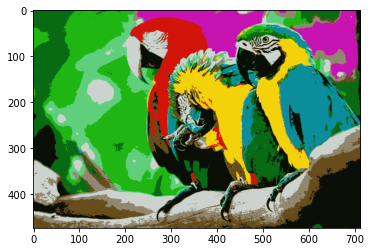

In [6]:
image_df = image.reshape(image.shape[0] * image.shape[1], 3)
clf = KMeans(init='k-means++', random_state=241, n_clusters=11)
clf.fit(X=image_df)
image_df = image_df.transpose()
image_df = np.vstack((image_df, clf.labels_))
image_df = image_df.transpose()
x = np.vstack([clf.cluster_centers_[i] for i in clf.labels_])
df_mean = pd.DataFrame(data=x, columns=['R', 'G', 'B'])
image1 = np.array(df_mean, dtype='float')
image1 = image1.reshape(474, 713, 3)
pylab.imshow(image1)

### Use PSNR-metrics (pick signal-to-noise ratio) to estimate the result (the target level is above 20)

In [7]:
def my_psnr(original_image, test_image, max_i):
    height = original_image.shape[0]
    width = original_image.shape[1]
    
    difference_matrix = original_image - test_image
    sigma = sum([sum(i) for i in difference_matrix**2])
    mse = sum(sigma)/(3*height*width)
    return 10*log((max_i/mse), 10)

In [9]:
print(peak_signal_noise_ratio(image, image1, data_range=1))
print(my_psnr(image, image1, 1))

20.162932572749135
20.162932572749128


### 11 clusters is enough